In [ ]:
#HOW TO RERUN THE CODE
#YOU CAN CHOOSE TO RESTART AND RERUN THE KERNEL
#JUST CHANGING THE PATHS OF DATASET AND TEST_DATASET IN THE CODE SNIPPET (reading train and test data)BELOW IS NECESSARY
#In test data folder where all test images are present, I created new_folder and pasted all test images in new_folder
#c:Users->dataset->test->new_folder(this folder has all test images)  --> this is the path of my Test images
#"c:Users\dataset\test"       ---> path to be given in test_dataset variable
# (test folder should have only new_folder but nothing else)

In [1]:
#Importing required modules from libraries
import os
import time
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import numpy as np
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.autograd import Variable

# READING TRAIN AND TEST DATA

In [2]:
#transform function to transform image to tensor
#transforming it as Grayscale so that it has only one Channel
TRANSFORM_IMG = transforms.Compose([
    transforms.ToTensor(), transforms.Grayscale()
    ])

#TRAIN_DATA
#using ImageFolder inbuilt function 
#Name of a Image folder will be the label of images of that folder
dataset = torchvision.datasets.ImageFolder(root= r'C:\Users\Owner\Documents\Project_Image_Classification\dataset\train', transform=TRANSFORM_IMG)

#TEST_DATA
#READING THE TEST_DATA USING IMAGE FOLDER INBUILT FUNCTION
test_dataset = torchvision.datasets.ImageFolder(root=r'C:\Users\Owner\Documents\Project_Image_Classification\dataset\test', transform=TRANSFORM_IMG)
#MAKING TEST_DATASET ITERABLE
test = torch.utils.data.DataLoader(test_dataset)

# CONVOLUTIONAL NEURAL NETWORKS

In [3]:
#Making dataset Iterable
trainloader= torch.utils.data.DataLoader(dataset,batch_size=150, shuffle=True)

In [4]:
#Model Class
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Convolution 1
        #In_channels=28(size of image)
        #out_channels =16(arbitrary)- no.of filters
        #K-kernel size (size of filter); s-stride; p-padding size
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        #output size from cnn1 will be 
        # out = ((in_channels + 2*p - k) / s) + 1
        # out = ((28+2*0-5)/1)+1 = 24 (size of output)
        self.relu1 = nn.ReLU()
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        #after max pool1 Size= 24/2 = 12
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        #output size from cnn2 will be 
        # out = ((in_channels + 2*p - k) / s) + 1 
        # out = ((12+2*0-5)/1)+1 = 8 (size of output)
        self.relu2 = nn.ReLU()
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        #after max pool2 Size= 8/2 = 4(size of output)       
        # Fully connected 1
        #outputsize=4 and no.of out channels=32(no.of filters)
        #size of fc1 should be (32*4*4) and number of classes to predict =10
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        # Max pool 1
        out = self.maxpool1(out)
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        # Max pool 2 
        out = self.maxpool2(out)
        # Resize
        #Flatten
        out = out.view(out.size(0), -1)
        # Linear function
        out = self.fc1(out)
        return out

In [5]:
#INSTANTIATE MODEL CLASS
model = CNNModel()
#INSTANTIATE LOSS CLASS
criterion = nn.CrossEntropyLoss()
#INSTANTIATE OPTIMIZER CLASS
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [6]:
#Defining Function to calculate Loss and Accuracy after each Epoch
def compute_Loss_accuracy(model, data_loader):
    running_loss=0
    correct_pred, num_examples = 0, 0
    #Iterating Through Data
    for i, (features, targets) in enumerate(data_loader):
        #getting logits(The raw predictions which come out of the last layer of the neural network.)
        probas = model(features)
        #using torch.max to get predicted class
        _, predicted_labels = torch.max(probas.data, 1)
        #using cross entropy loss to compare outputs and labels
        loss = criterion(outputs, labels)
        #running loss - adds loss after every batch
        running_loss+=loss.item()
        num_examples += targets.size(0)
        #correct_pred - keeps count of correct predictions
        correct_pred += (predicted_labels == targets).sum()
    #calculating test_Loss
    train_loss=running_loss/len(data_loader)
    #calculating accuracy
    accuracy=correct_pred.float()/num_examples * 100
    return train_loss, accuracy

In [7]:

# TRAIN THE MODEL
loss_cnn=[]
accuracy_cnn=[]
N_Epochs = 10
start_time = time.time() 
for epoch in range(N_Epochs):
    for i, (images, labels) in enumerate(trainloader):
        #images = images.narrow(1,0,1)
        images = images.narrow(1,0,1)
        labels = Variable(labels)
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        # Forward pass to get output/logits
        outputs = model(images)
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        # Getting gradients w.r.t. parameters
        loss.backward()     
        # Updating parameters
        optimizer.step()
    #evaluating model-checks whether all modules are defined properly 
    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        #getting loss and accuracy from previously defined models
        loss,accu=compute_Loss_accuracy(model, trainloader)
        #Appending loss and accuracy to lists, to plot them
        loss_cnn.append(loss)
        accuracy_cnn.append(accu)
        #Print Epoch, Cost, Train Accuracy
        print('Epoch: %03d/%03d | Cost: %.4f | Train: %.3f%%' % (
              epoch+1, N_Epochs, loss_cnn[-1], 
              accuracy_cnn[-1]))        
    #Print elapsed time for each epoch    
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
#Print TOtal Training time
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))


Epoch: 001/010 | Cost: 1.2184 | Train: 60.597%
Time elapsed: 8.86 min
Epoch: 002/010 | Cost: 0.8550 | Train: 74.329%
Time elapsed: 17.47 min
Epoch: 003/010 | Cost: 0.7091 | Train: 79.225%
Time elapsed: 26.52 min
Epoch: 004/010 | Cost: 0.6296 | Train: 81.892%
Time elapsed: 35.82 min
Epoch: 005/010 | Cost: 0.4515 | Train: 83.067%
Time elapsed: 45.73 min
Epoch: 006/010 | Cost: 0.5164 | Train: 84.702%
Time elapsed: 55.18 min
Epoch: 007/010 | Cost: 0.4651 | Train: 84.994%
Time elapsed: 64.83 min
Epoch: 008/010 | Cost: 0.4821 | Train: 86.234%
Time elapsed: 74.09 min
Epoch: 009/010 | Cost: 0.3517 | Train: 86.897%
Time elapsed: 83.24 min
Epoch: 010/010 | Cost: 0.3176 | Train: 87.174%
Time elapsed: 91.80 min
Total Training Time: 91.80 min


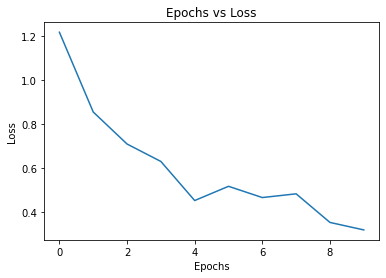

In [8]:
#Plotting Loss vs Epochs graph
import matplotlib.pyplot as plt
plt.plot(loss_cnn)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.show()

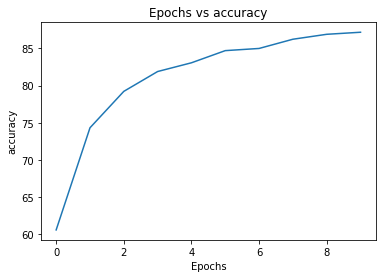

In [9]:
#plotting Accuracy vs Epochs graph
plt.plot(accuracy_cnn)
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Epochs vs accuracy")
plt.show()

# GETTING CNN PREDICTIONS FOR TEST DATA

In [12]:
#KAGGLE SUBMISSION REQUIRES FIRST COLUMN TO HAVE INDICES FROM 2,00,000 TO 2,40,000
#CREATING A LIST OF INDICES SO THAT WE CAN ATTACH IT TO FINAL DATAFRAME
id = []
for i in range(40000):
    id.append(i+240000)
classification = []
#GETTING PREDICTIONS FOR TEST DATA
for i, (images, labels) in enumerate(test):
    #FEEDING TEST DATA TO MODEL and getting logits
    outputs = model(images)
    #GETTING PREDICTIONS FROM LOGITS
    _, predicted = torch.max(outputs.data, 1)
    #APPENDING ALL PREDICTIONS TO A LIST
    classification.append(int(predicted[0]))

In [13]:
#ZIPPING TWO LISTS TO A DATAFRAME
zipped = list(zip(id,classification))
df = pd.DataFrame(zipped, columns=['id', 'classification'])
#EXPORTING THE PREDICTIONS ALONG WITH INDICES AS .csv FILE
df.to_csv(r"C:\Users\indra\OneDrive\Desktop\dataset\New folder\RNNsubmission.csv", index=False)
#CHECKING KAGGLE SUBMISSION
print(df)

           id  classification
0      240000               6
1      240001               9
2      240002               0
3      240003               8
4      240004               2
...       ...             ...
39995  279995               0
39996  279996               8
39997  279997               6
39998  279998               8
39999  279999               5

[40000 rows x 2 columns]


# RECURRENT NEURAL NETWORKS

In [3]:
#Importing required modules from libraries
import os
import time
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import numpy as np
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [4]:
#Making dataset Iterable
trainloader= torch.utils.data.DataLoader(dataset,batch_size=150, shuffle=True)

In [5]:
# parameters 
N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 10
N_EPOCHS = 10
BATCH_SIZE = 150

In [6]:
# RNN Model
class ImageRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.basic_rnn = nn.RNN(self.n_inputs, self.n_neurons) 
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
        
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))
    
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
        _ , self.hidden = self.basic_rnn(X, self.hidden)    
        
        out = self.FC(self.hidden)
        
        return out.view(-1, self.n_outputs) # batch_size X n_output

In [7]:
# Training

loss_rnn=[]
accuracy_rnn=[]
running_loss=0
# Model instance for ImageRNN class
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
#initializing loss function; CrossEntropyLoss
criterion = nn.CrossEntropyLoss()
#using Adam Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Defining Function to calculate Loss and Accuracy after each Epoch
def compute_Loss_accuracy(model, data_loader):
    running_loss=0
    correct_pred, num_examples = 0, 0
    #Iterating Through Data
    for i, (features, targets) in enumerate(data_loader):
        #getting logits(The raw predictions which come out of the last layer of the neural network.)
        probas = model(features.view(-1, 28,28))
        #using torch.max to get predicted class
        _, predicted_labels = torch.max(probas.data, 1)
        #using cross entropy loss to compare outputs and labels
        loss = criterion(probas, targets)
        #running loss - adds loss after every batch
        running_loss+=loss.item()
        num_examples += targets.size(0)
        #correct_pred - keeps count of correct predictions
        correct_pred += (predicted_labels == targets).sum()
    #calculating test_Loss
    train_loss=running_loss/len(data_loader)
    #calculating accuracy
    accuracy=correct_pred.float()/num_examples * 100
    return train_loss, accuracy
    
start_time = time.time()    
for epoch in range(N_EPOCHS):  # loop over the dataset multiple times
    model.train()
    # TRAINING ROUND
    for batch_idx, data in enumerate(trainloader):
         # zero the parameter gradients
        optimizer.zero_grad()
        # reset hidden states
        model.hidden = model.init_hidden() 
        # get the inputs
        inputs, labels = data
        #new tensor with the same data but of a different shape
        inputs = inputs.view(-1, 28,28) 
        # forward + backward + optimize
        #feeding data to the model
        outputs = model(inputs)
        #loss function - Cross Entropy Loss
        cost = criterion(outputs, labels)
        #Backward Propogation
        cost.backward()
        #OPtimizer step
        optimizer.step()
    #evaluating model-checks whether all modules are defined properly 
    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        #getting loss and accuracy from previously defined models
        loss,accu=compute_Loss_accuracy(model, trainloader)
        #Appending loss and accuracy to lists, to plot them
        loss_rnn.append(loss)
        accuracy_rnn.append(accu)
        #Print Epoch, Cost, Train Accuracy
        print('Epoch: %03d/%03d | Cost: %.4f | Train: %.3f%%' % (
              epoch+1, N_EPOCHS, loss_rnn[-1], 
              accuracy_rnn[-1]))
    #Print elapsed time for each epoch    
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
#Print TOtal Training time
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/010 | Cost: 0.5546 | Train: 81.067%
Time elapsed: 13.03 min
Epoch: 002/010 | Cost: 0.4471 | Train: 84.768%
Time elapsed: 25.07 min
Epoch: 003/010 | Cost: 0.3839 | Train: 87.057%
Time elapsed: 37.88 min
Epoch: 004/010 | Cost: 0.3600 | Train: 87.768%
Time elapsed: 52.23 min
Epoch: 005/010 | Cost: 0.3393 | Train: 88.459%
Time elapsed: 68.50 min
Epoch: 006/010 | Cost: 0.3243 | Train: 88.906%
Time elapsed: 83.96 min
Epoch: 007/010 | Cost: 0.2981 | Train: 89.772%
Time elapsed: 99.88 min
Epoch: 008/010 | Cost: 0.3244 | Train: 89.033%
Time elapsed: 110.94 min
Epoch: 009/010 | Cost: 0.2893 | Train: 90.059%
Time elapsed: 125.67 min
Epoch: 010/010 | Cost: 0.3002 | Train: 89.795%
Time elapsed: 137.83 min
Total Training Time: 137.83 min


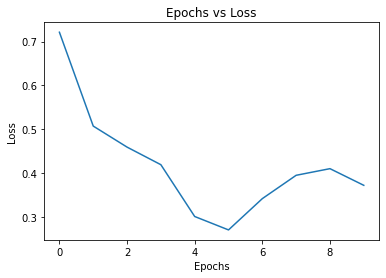

In [7]:
#Plotting Loss vs Epochs graph
import matplotlib.pyplot as plt
plt.plot(loss_rnn)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.show()

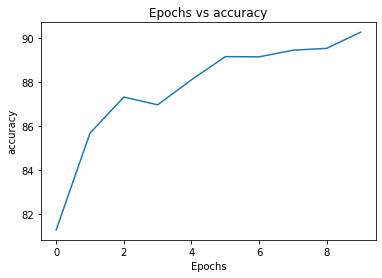

In [8]:
#plotting Accuracy vs Epochs graph
plt.plot(accuracy_rnn)
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Epochs vs accuracy")
plt.show()

# GETTING PREDICTIONS FOR TEST DATA

In [11]:
#KAGGLE SUBMISSION REQUIRES FIRST COLUMN TO HAVE INDICES FROM 2,00,000 TO 2,40,000
#CREATING A LIST OF INDICES SO THAT WE CAN ATTACH IT TO FINAL DATAFRAME
id = []
for i in range(40000):
    id.append(i+240000)
classification = []
#GETTING PREDICTIONS FOR TEST DATA
for i, (images, labels) in enumerate(test):
    #new tensor with the same data but of a different shape
    images = images.view(-1, 28,28) 
    #FEEDING TEST DATA TO MODEL and getting logits
    outputs = model(images)
    #GETTING PREDICTIONS FROM LOGITS
    _, predicted = torch.max(outputs.data, 1)
    #APPENDING ALL PREDICTIONS TO A LIST
    classification.append(int(predicted[0]))

In [12]:
#ZIPPING TWO LISTS TO A DATAFRAME
zipped = list(zip(id,classification))
df = pd.DataFrame(zipped, columns=['id', 'classification'])
#EXPORTING THE PREDICTIONS ALONG WITH INDICES AS .csv FILE
df.to_csv(r"C:\Users\indra\OneDrive\Desktop\dataset\New folder\RNNsubmission.csv", index=False)
#CHECKING KAGGLE SUBMISSION
print(df)

           id  classification
0      240000               6
1      240001               9
2      240002               0
3      240003               8
4      240004               2
...       ...             ...
39995  279995               0
39996  279996               8
39997  279997               6
39998  279998               8
39999  279999               5

[40000 rows x 2 columns]


# ResNet

In [1]:
#Importing required modules from libraries
import os
import time
import numpy as np
import pandas as pd
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
# Hyperparameters
random_seed = 123
learning_rate = 0.01
num_epochs = 10
batch_size = 128
num_classes = 10

In [4]:
#Making dataset Iterable
train_loader= torch.utils.data.DataLoader(dataset, batch_size=batch_size,shuffle=True)

# ResNet with convolutional blocks for resizing


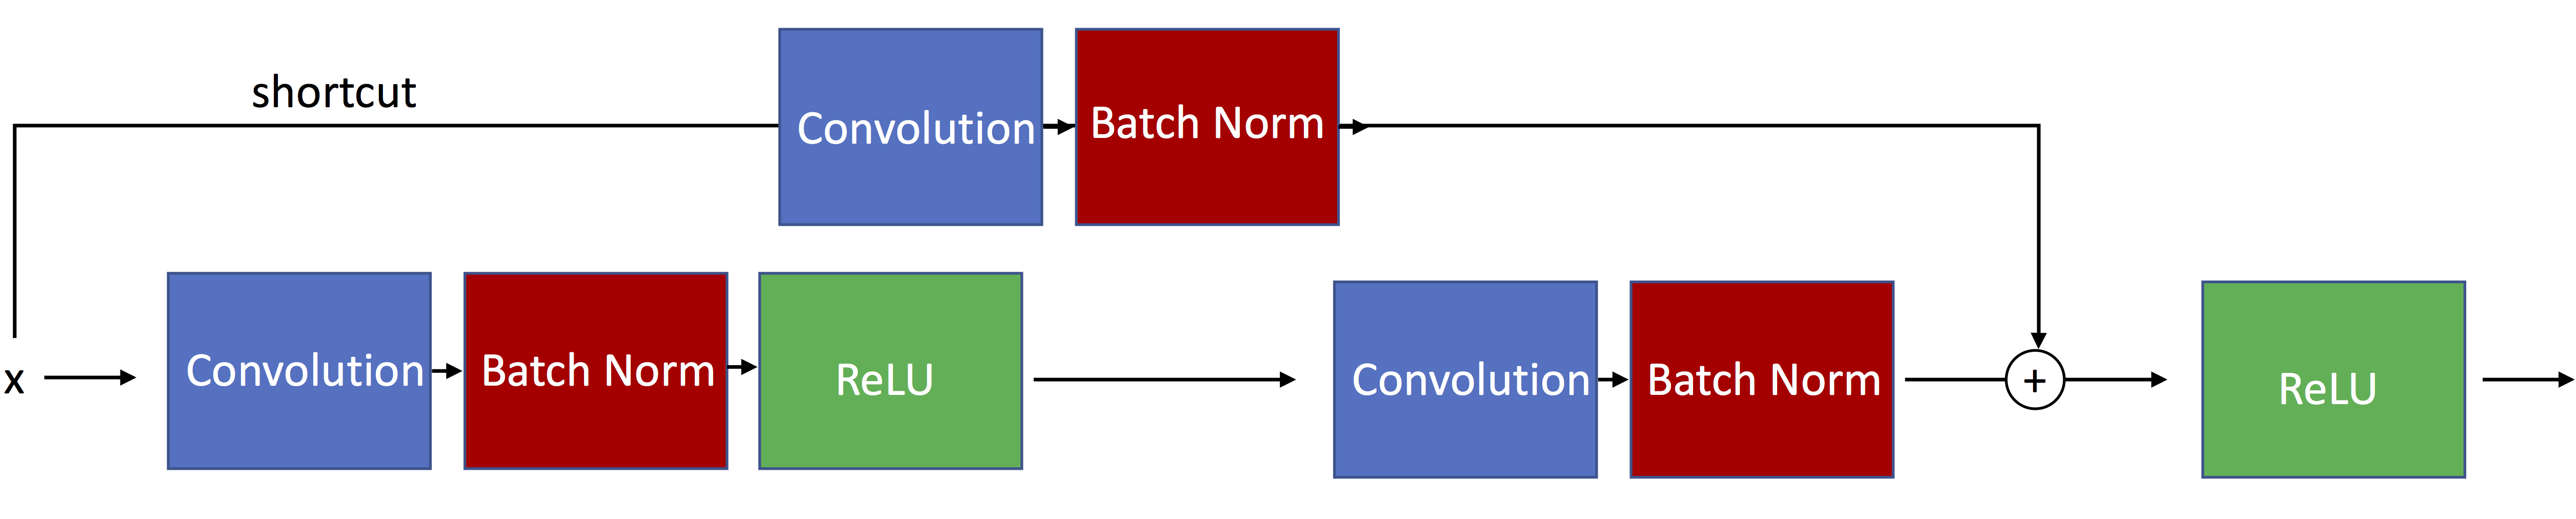

In [5]:
#Residual Block 
class ResidualBlock(torch.nn.Module):
#Helper Class
    def __init__(self, channels):
        
        super(ResidualBlock, self).__init__()
        #Inititalizing self.block, which gives conv layers, Batch Norm layers, Relu funcs
        # Kernel Size, stride, padding have predefined sizes according to standard architecture
        self.block = nn.Sequential(
                nn.Conv2d(channels[0],channels[1],kernel_size= 3,stride=2,padding=1),
                nn.BatchNorm2d(channels[1]),
                nn.ReLU(inplace=True),
                nn.Conv2d(channels[1],channels[2],kernel_size= 1,stride=1,padding=0),   
                nn.BatchNorm2d(channels[2])
        )
        #Initializing Shortcut block with one convolution layer and one Batch Norm layer/
        #to add to the output of the Self.block #resizing here
        self.shortcut =nn.Sequential(
                nn.Conv2d(channels[0],channels[2],kernel_size= 1,stride= 2,padding=0),
                nn.BatchNorm2d(channels[2])
        )
        #Forward Block    
    def forward(self, x):
        #Intitializing input as shortcut
        shortcut = x
        #Passing input to block (conv,batch,relu)
        block = self.block(x)
        #passing input to +
        shortcut = self.shortcut(x) 
        #SKIP CONNECTION (passing block+shortcut into relu)
        x = nn.functional.relu(block+shortcut)
        return x

In [12]:

#MODEL
class ConvNet(torch.nn.Module):

    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        #Intitializing residual_block_1 with channels 
        #(in_channels,out_channels) = (1,64),(64,128)
        self.residual_block_1 = ResidualBlock(channels=[1, 64, 128])
        #Intitializing residual_block_2 with channels 
        #(in_channels,out_channels) = (128,256),(256,512)        
        self.residual_block_2 = ResidualBlock(channels=[128, 256, 512])
        self.linear_1 = nn.Linear(7*7*512, num_classes)
        
    def forward(self, x):
        out = self.residual_block_1(x)
        out = self.residual_block_2(out)
        #flatten and get logits from Linear
        logits = self.linear_1(out.view(-1, 7*7*512))
        return logits

#Initializind weights
torch.manual_seed(random_seed)
#instance of Convnet
model = ConvNet(num_classes=num_classes)
#adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [13]:
loss_resnet=[]
accuracy_resnet=[]
#Defining Function to calculate Loss and Accuracy after each Epoch
def compute_Loss_accuracy(model, data_loader):
    running_loss=0
    correct_pred, num_examples = 0, 0
    #Iterating Through Data
    for i, (features, targets) in enumerate(data_loader):
        #getting logits(The raw predictions which come out of the last layer of the neural network.)
        probas = model(features)
        #using torch.max to get predicted class
        _, predicted_labels = torch.max(probas, 1)
        #using cross entropy loss to compare outputs and labels
        loss = F.cross_entropy(probas, targets)
        #running loss - adds loss after every batch
        running_loss+=loss.item()
        num_examples += targets.size(0)
        #correct_pred - keeps count of correct predictions
        correct_pred += (predicted_labels == targets).sum()
    #calculating test_Loss
    train_loss=running_loss/len(data_loader)
    #calculating accuracy
    accuracy=correct_pred.float()/num_examples * 100
    return train_loss, accuracy

start_time = time.time()
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
        ### FORWARD AND BACK PROP
        logits = model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        cost.backward()
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
    #evaluating model-checks whether all modules are defined properly 
    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        #getting loss and accuracy from previously defined models
        loss,accu=compute_Loss_accuracy(model, train_loader)
        #Appending loss and accuracy to lists, to plot them
        loss_resnet.append(loss)
        accuracy_resnet.append(accu)
        #Print Epoch, Cost, Train Accuracy
        print('Epoch: %03d/%03d | Cost: %.4f | Train: %.3f%%' % (
              epoch+1, num_epochs, loss_resnet[-1], 
              accuracy_resnet[-1]))        
    #Print elapsed time for each epoch 
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
#Total Traininng Time
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/010 | Cost: 0.2981 | Train: 89.776%
Time elapsed: 42.01 min
Epoch: 002/010 | Cost: 0.2538 | Train: 91.145%
Time elapsed: 79.99 min
Epoch: 003/010 | Cost: 0.2308 | Train: 91.610%
Time elapsed: 117.17 min
Epoch: 004/010 | Cost: 0.1985 | Train: 92.909%
Time elapsed: 160.42 min
Epoch: 005/010 | Cost: 0.1938 | Train: 93.080%
Time elapsed: 208.26 min
Epoch: 006/010 | Cost: 0.1661 | Train: 93.965%
Time elapsed: 252.66 min
Epoch: 007/010 | Cost: 0.1715 | Train: 93.826%
Time elapsed: 299.63 min
Epoch: 008/010 | Cost: 0.1589 | Train: 94.321%
Time elapsed: 339.11 min
Epoch: 009/010 | Cost: 0.1553 | Train: 94.382%
Time elapsed: 378.19 min
Epoch: 010/010 | Cost: 0.1415 | Train: 94.864%
Time elapsed: 417.11 min
Total Training Time: 417.11 min


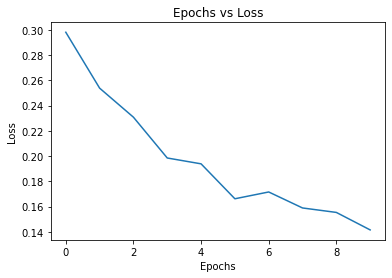

In [14]:
#Plotting Loss vs Epochs graph
import matplotlib.pyplot as plt
plt.plot(loss_resnet)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.show()

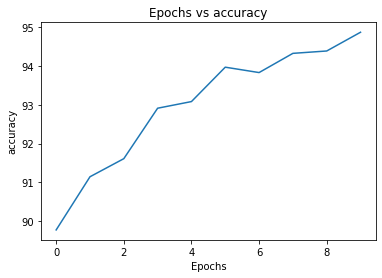

In [15]:
#plotting Accuracy vs Epochs graph
plt.plot(accuracy_resnet)
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Epochs vs accuracy")
plt.show()

In [18]:
#KAGGLE SUBMISSION REQUIRES FIRST COLUMN TO HAVE INDICES FROM 2,00,000 TO 2,40,000
#CREATING A LIST OF INDICES SO THAT WE CAN ATTACH IT TO FINAL DATAFRAME
id = []
for i in range(40000):
    id.append(i+240000)
classification = []
#GETTING PREDICTIONS FOR TEST DATA
for i, (images, labels) in enumerate(test): 
    #FEEDING TEST DATA TO MODEL and getting logits
    outputs = model(images)
    #GETTING PREDICTIONS FROM LOGITS
    _, predicted = torch.max(outputs, 1)
    #APPENDING ALL PREDICTIONS TO A LIST
    classification.append(int(predicted[0]))

In [19]:
#ZIPPING TWO LISTS TO A DATAFRAME
zipped = list(zip(id,classification))
df = pd.DataFrame(zipped, columns=['id', 'classification'])
#EXPORTING THE PREDICTIONS ALONG WITH INDICES AS .csv FILE
df.to_csv(r"C:\Users\indra\OneDrive\Desktop\dataset\New folder\RNNsubmission.csv", index=False)
#CHECKING KAGGLE SUBMISSION
print(df)

           id  classification
0      240000               6
1      240001               9
2      240002               0
3      240003               8
4      240004               2
...       ...             ...
39995  279995               6
39996  279996               8
39997  279997               6
39998  279998               8
39999  279999               5

[40000 rows x 2 columns]


# Comparision Between Models

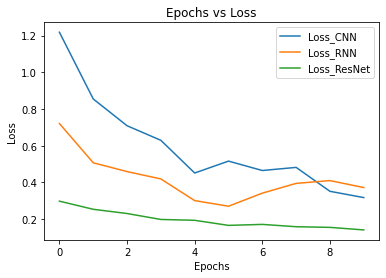

In [8]:
#Plotting Loss vs Epochs graph
import matplotlib.pyplot as plt
plt.plot(loss_cnn,label="Loss_CNN")
plt.plot(loss_rnn,label="Loss_RNN")
plt.plot(loss_resnet,label="Loss_ResNet")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.show()

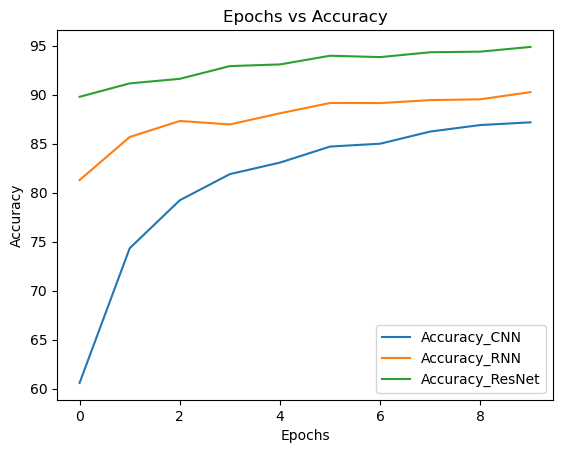

In [2]:
#Plotting Accuracy vs Epochs graph
import matplotlib.pyplot as plt
plt.plot(accuracy_cnn,label="Accuracy_CNN")
plt.plot(accuracy_rnn,label="Accuracy_RNN")
plt.plot(accuracy_resnet,label="Accuracy_ResNet")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.show()